# <center>Bank Marketing</center>

## Understanding the dataset

__Problem statement__:
We have data from a Portuguese bank on details of customers related to selling a term deposit The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio

__Data info__:
1. age (numeric)
2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")
8. contact: contact communication type (categorical: "cellular","telephone")
9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric)
12. campaign: number of contacts performed during this campaign and for this client
13. pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. previous: number of contacts performed before this campaign and for this client
15. poutcome: outcome of the previous marketing campaign 
16. emp.var.rate: employment variation rate - quarterly indicator 
17. cons.price.idx: consumer price index - monthly indicator
18. cons.conf.idx: consumer confidence index - monthly indicator
19. euribor3m: euribor 3 month rate
20. nr.employed: number of employees - quarterly indicator
    
   
  
 
  

## Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", None)

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier

# !pip install xgboost

## Loading Data

In [47]:
data=pd.read_csv("https://raw.githubusercontent.com/rahulinchal/fgaifka/main/bank-additional-full.csv",sep=';')

In [48]:
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16214,33,blue-collar,divorced,basic.9y,no,no,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
33287,43,admin.,married,high.school,no,yes,no,cellular,may,tue,...,3,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
34086,39,management,divorced,university.degree,no,no,no,cellular,may,wed,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
3711,29,blue-collar,single,unknown,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
27686,39,technician,married,professional.course,no,yes,no,telephone,dec,tue,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.428,5176.3,no
39557,34,technician,married,professional.course,no,yes,no,cellular,apr,fri,...,2,6,2,success,-1.8,93.749,-34.6,0.663,5008.7,no
17188,57,admin.,single,unknown,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
21950,41,admin.,divorced,university.degree,no,yes,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
19943,34,admin.,divorced,high.school,no,no,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
26044,52,admin.,married,high.school,no,yes,no,cellular,nov,wed,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no


## Exploratory Data Analysis

In [49]:
data.shape

(41188, 21)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [51]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

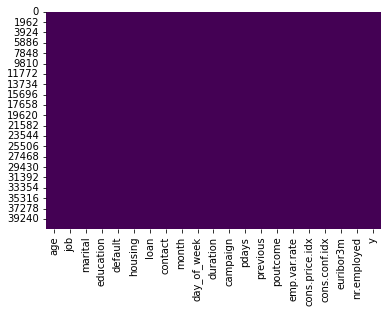

In [52]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

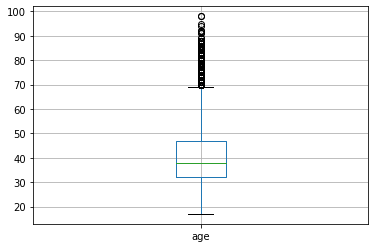

In [53]:
data.boxplot('age')

<AxesSubplot:>

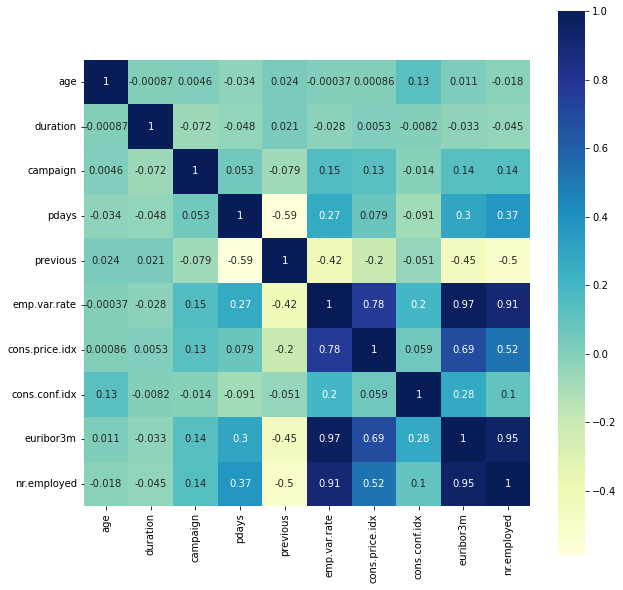

In [54]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True,square=True,cmap="YlGnBu")

In [55]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

__From above we can see that the percentage of customers most likely to subscribe is very low.__

### Lets see which factors affect the most?

In [56]:
data['job'].value_counts(normalize=True)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

In [57]:
np.round(data.groupby(["y"]).mean() ,1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.9,220.8,2.6,984.1,0.1,0.2,93.6,-40.6,3.8,5176.2
yes,40.9,553.2,2.1,792.0,0.5,-1.2,93.4,-39.8,2.1,5095.1


In [58]:
pd.crosstab(data['job'], data['y'], normalize='index').sort_values(by='yes',ascending=True )

y,no,yes
job,,
blue-collar,0.931057,0.068943
services,0.918619,0.081381
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
self-employed,0.895144,0.104856
technician,0.891740,0.108260
unknown,0.887879,0.112121
management,0.887825,0.112175
admin.,0.870274,0.129726


In [59]:
pd.crosstab(data['housing'],data['y'],normalize='index').sort_values(by='yes',ascending=True)

y,no,yes
housing,,
unknown,0.891919,0.108081
no,0.891204,0.108796
yes,0.883806,0.116194


In [60]:
pd.crosstab(data['loan'],data['y'],normalize='index').sort_values(by='yes',ascending=True)

y,no,yes
loan,,
unknown,0.891919,0.108081
yes,0.890685,0.109315
no,0.886598,0.113402


In [61]:
pd.crosstab(data['education'], data['y'], normalize='index').sort_values(by='yes',ascending=True )

y,no,yes
education,,
basic.9y,0.921754,0.078246
basic.6y,0.917976,0.082024
basic.4y,0.897510,0.102490
high.school,0.891645,0.108355
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003
illiterate,0.777778,0.222222


In [62]:
pd.crosstab(data['marital'], data['y'], normalize='index').sort_values(by='yes',ascending=True )

y,no,yes
marital,,
married,0.898427,0.101573
divorced,0.896791,0.103209
single,0.859959,0.140041
unknown,0.850000,0.150000


In [63]:
pd.crosstab(data['contact'], data['y'], normalize='index').sort_values(by='yes',ascending=True )

y,no,yes
contact,,
telephone,0.947687,0.052313
cellular,0.852624,0.147376


In [64]:
pd.crosstab(data['pdays'], data['y'], normalize='index').sort_values(by='yes',ascending=True )

y,no,yes
pdays,,
20,1.000000,0.000000
999,0.907418,0.092582
17,0.750000,0.250000
1,0.692308,0.307692
19,0.666667,0.333333
12,0.551724,0.448276
4,0.466102,0.533898
11,0.464286,0.535714
16,0.454545,0.545455


__From above the after normalizing the no of target audience vs the subscription rate the Potential customers are__:
1. Students are most likely to subscribe
2. Subscription rate of illiterates is higher
3. People having cellphone are most likely to subscribe
4. Housing and loan has similar subscription rate in their sub types, i.e.; no much variance here.
5. People whose marital stauts is unknown and single has higher chance of subscription


In [65]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Data Visualization

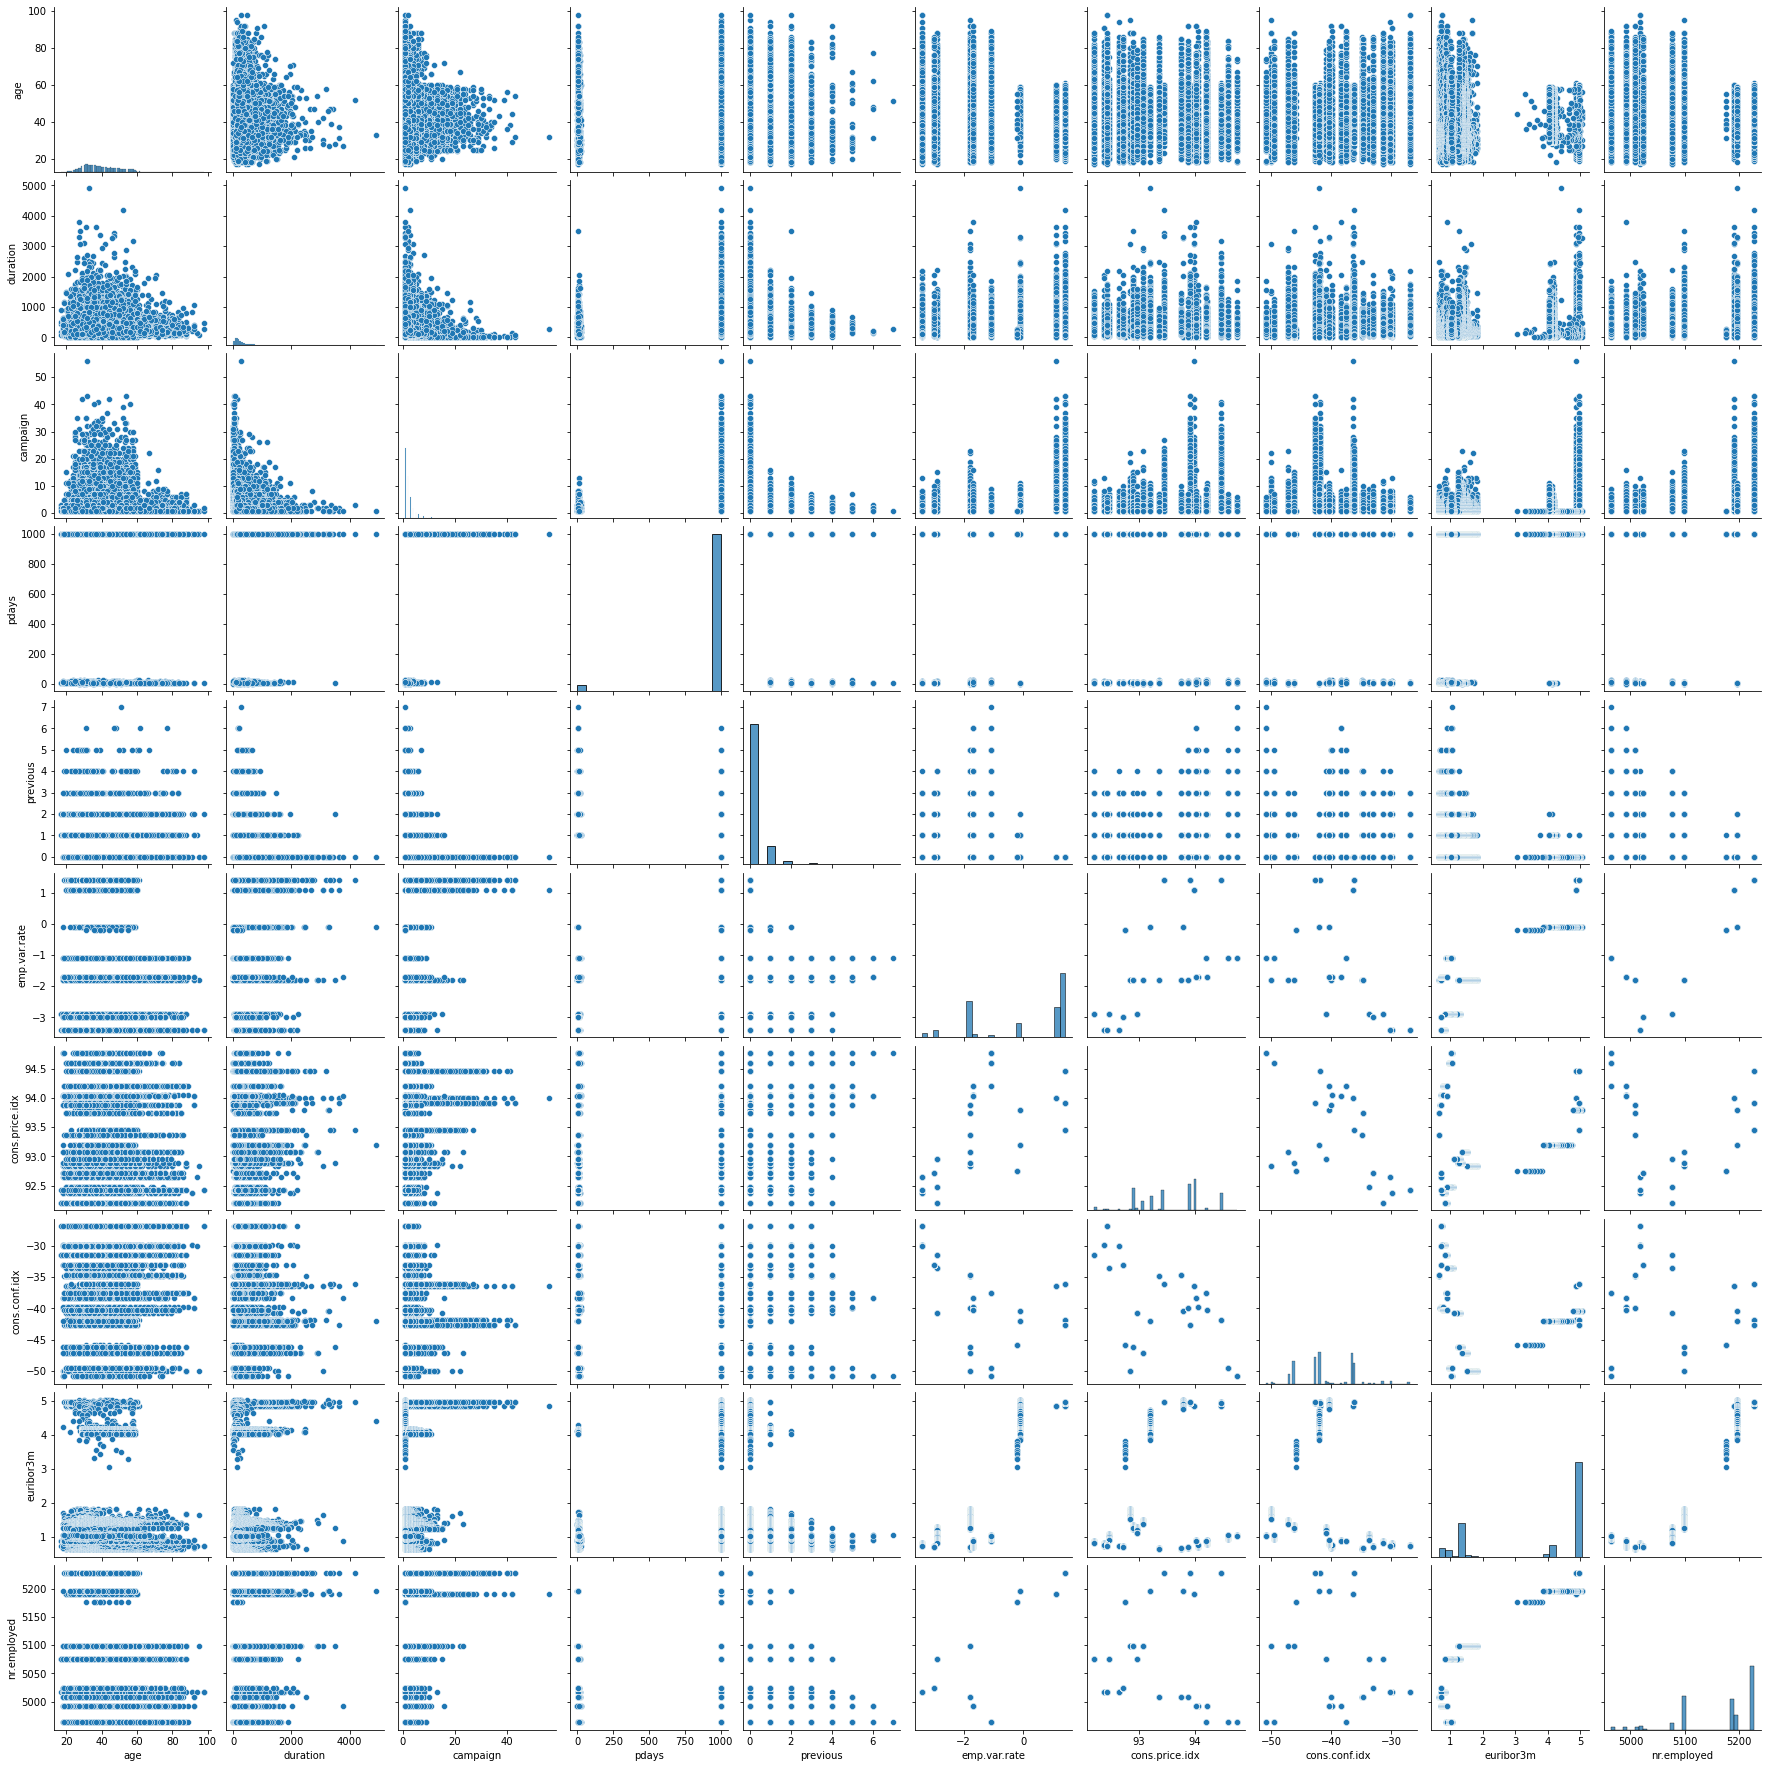

In [66]:
sns.pairplot(data)

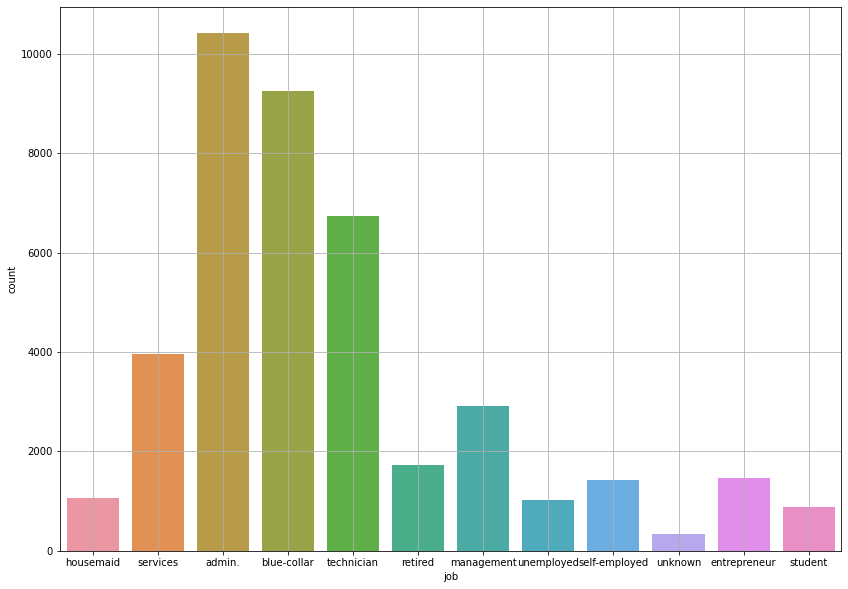

In [67]:
plt.figure(figsize=(14,10))
sns.countplot(x = 'job',data = data)
plt.grid()

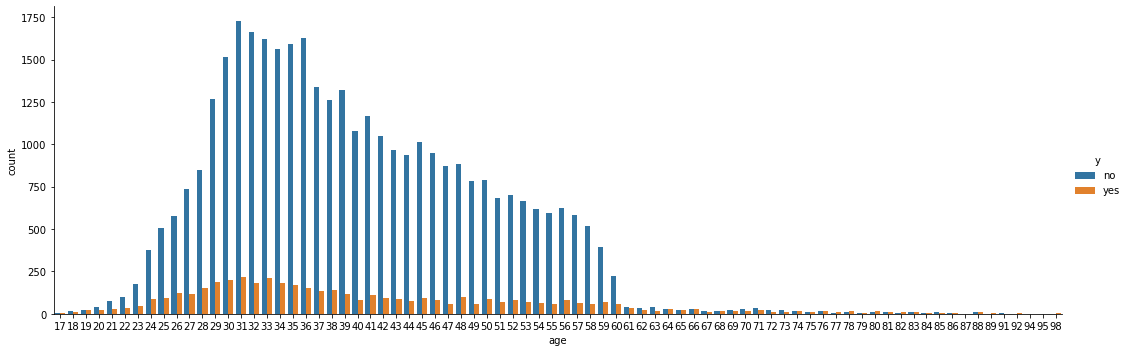

In [68]:
sns.factorplot('age',hue='y',data=data,kind='count',aspect=3,size=5)

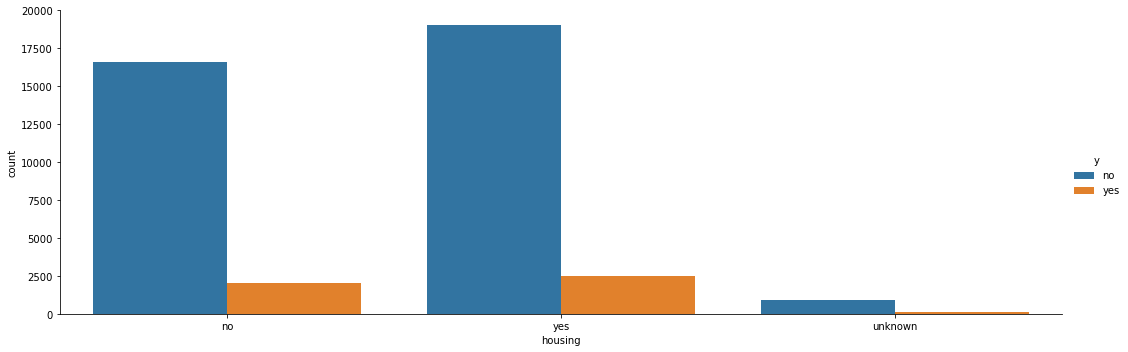

In [69]:
sns.factorplot('housing',hue='y',data=data,kind='count',aspect=3,size=5)

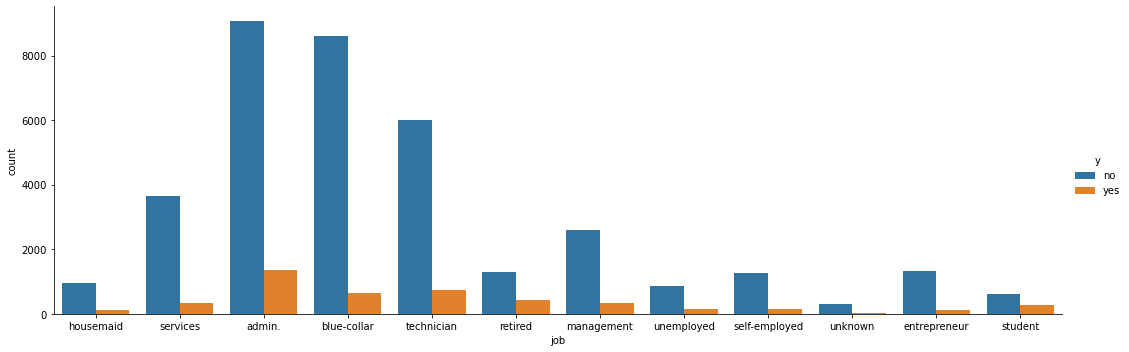

In [70]:
sns.factorplot('job',hue='y',data=data,kind='count',aspect=3,size=5)

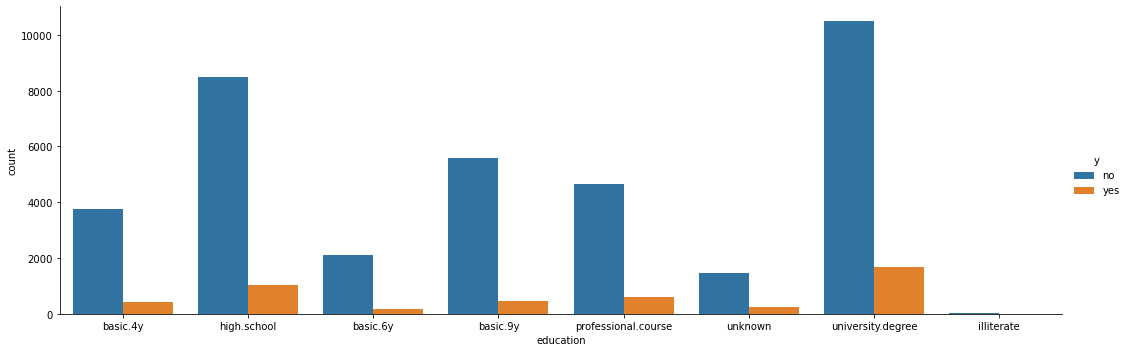

In [71]:
sns.factorplot('education',hue='y',data=data,kind='count',aspect=3,size=5)

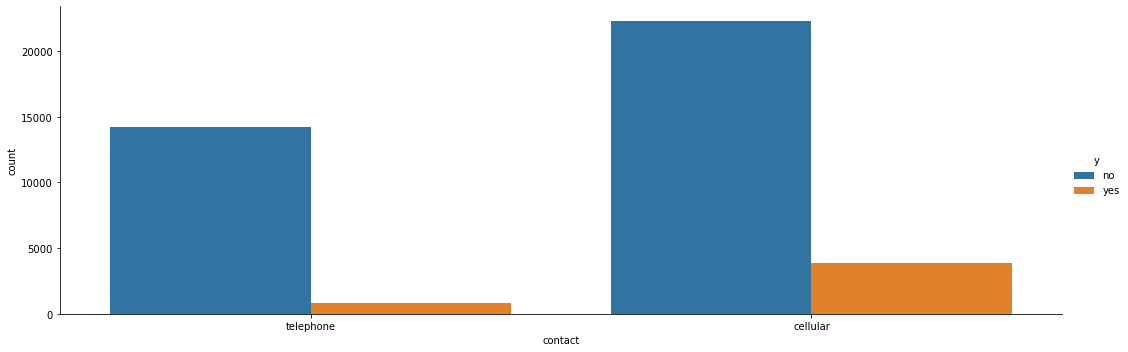

In [72]:
sns.factorplot('contact',hue='y',data=data,kind='count',aspect=3,size=5)

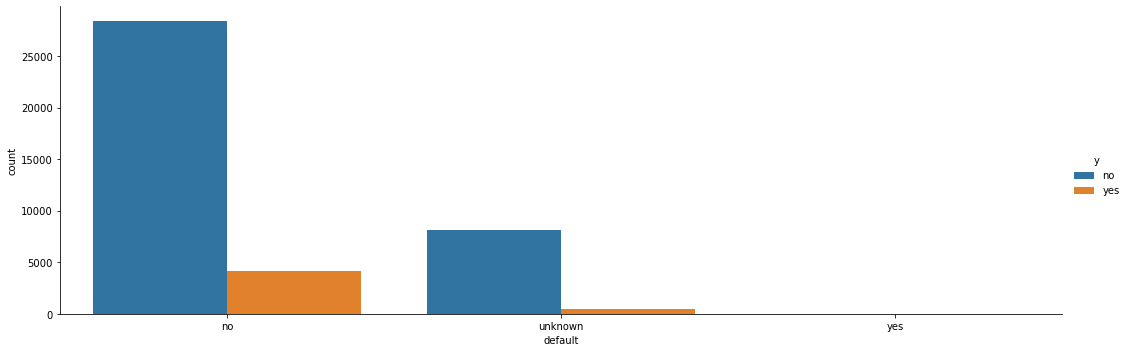

In [73]:
sns.factorplot('default',hue='y',data=data,kind='count',aspect=3,size=5)

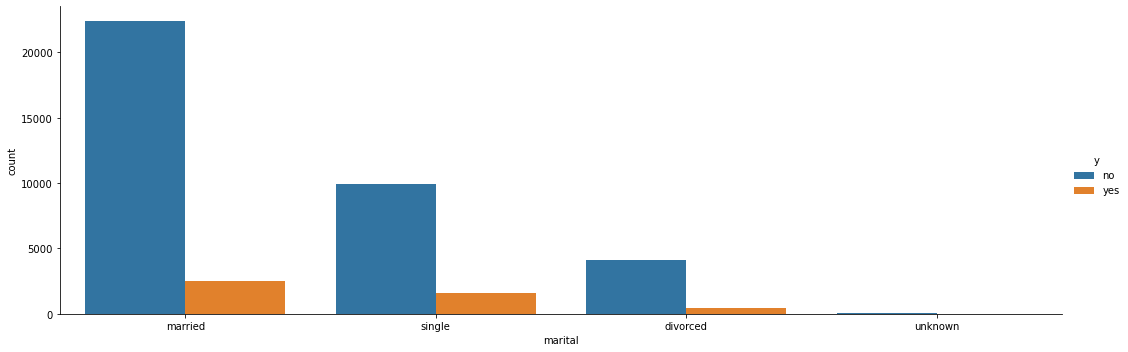

In [74]:
sns.factorplot('marital',hue='y',data=data,kind='count',aspect=3,size=5)

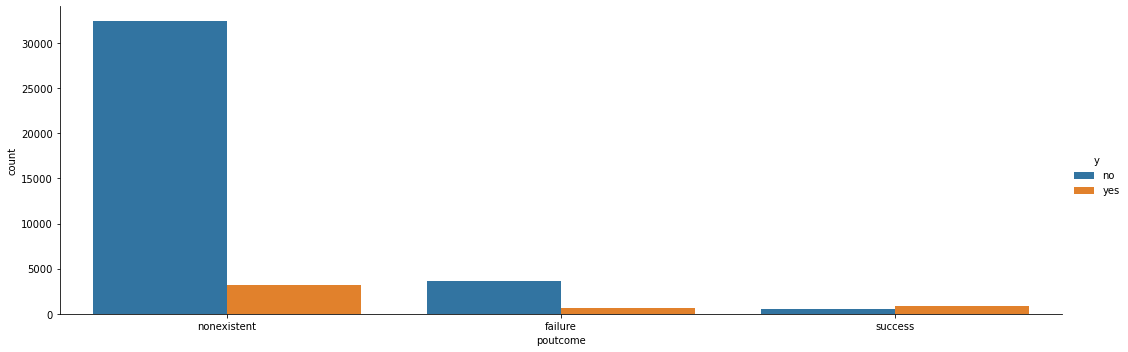

In [75]:
sns.factorplot('poutcome',hue='y',data=data,kind='count',aspect=3,size=5)

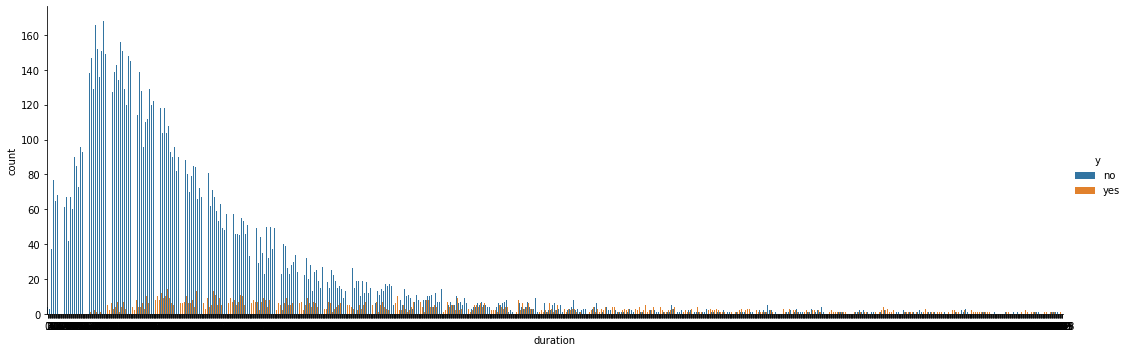

In [76]:
sns.factorplot('duration',hue='y',data=data,kind='count',aspect=3,size=5)

## One Hot Encoding

In [77]:
dummies=pd.get_dummies(data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']],
                      columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [78]:
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [79]:
data=pd.concat([data,dummies],axis=1)

In [80]:
 columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data.drop(columns,axis=1,inplace=True)

In [81]:
data['y']=data['y'].replace('no',0)
data['y']=data['y'].replace('yes',1)
data['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [82]:
def split(x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
#     print("Shape of x_train is:",x_train.shape,"; Shape of x_test is:" ,x_test.shape)
#     print("Shape of y_train is:",y_train.shape,"; Shape of y_test is:" ,y_test.shape)
    models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GaussianNB":GaussianNB(),
    "BaggingClassifier":BaggingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier()    
    }
    for name,model in models.items():
        model.fit(x_train,y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        confusion_matrix_of_test_data = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
#         confusion_matrix_of_train_data = pd.DataFrame(confusion_matrix(y_train, y_pred_train))

        print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
        print(name,"test score is: ",model.score(x_test,y_test))
        
#         print(confusion_matrix_of_test_data)
        print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
        print(name,"train score is: ",model.score(x_train,y_train))
        print("---------------------------------------------------------------------------------")

   



x=data.loc[:,data.columns!='y']
y=data.loc[:,'y'] 
split(x,y)



Accuracy score for test data is: 0.9092012624423403
LogisticRegression test score is:  0.9092012624423403
Accuracy score for train data is: 0.9093683881932642
LogisticRegression train score is:  0.9093683881932642
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.8911548110382779
DecisionTreeClassifier test score is:  0.8911548110382779
Accuracy score for train data is: 1.0
DecisionTreeClassifier train score is:  1.0
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.863720967872461
GaussianNB test score is:  0.863720967872461
Accuracy score for train data is: 0.8649370469286531
GaussianNB train score is:  0.8649370469286531
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.9094440398154892
BaggingClassifier test score is:  0.9094440398154892
Accuracy score for train data is: 0.99344455620

## Outlier Handling 

In [83]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q3-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
z=data.loc[:,data.columns!='y']
for i in z:
    low_lead_time,up_lead_time=remove_outlier(z[i])
    data[i]=np.where(data[i]>up_lead_time,up_lead_time,data[i])
    data[i]=np.where(data[i]<low_lead_time,low_lead_time,data[i])

<AxesSubplot:>

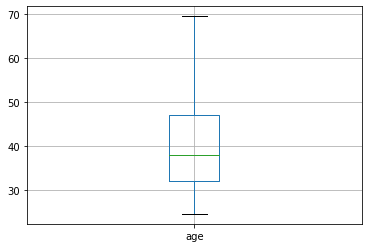

In [84]:
data.boxplot('age')

In [85]:
def split(x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
#     print("Shape of x_train is:",x_train.shape,"; Shape of x_test is:" ,x_test.shape)
#     print("Shape of y_train is:",y_train.shape,"; Shape of y_test is:" ,y_test.shape)
    models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "BaggingClassifier":BaggingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier()    
    }
    for name,model in models.items():
        model.fit(x_train,y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        confusion_matrix_of_test_data = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
#         confusion_matrix_of_train_data = pd.DataFrame(confusion_matrix(y_train, y_pred_train))

        print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
        print(name,"test score is: ",model.score(x_test,y_test))
        
#         print(confusion_matrix_of_test_data)
        print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
        print(name,"train score is: ",model.score(x_train,y_train))
        print("---------------------------------------------------------------------------------")

   



x=data.loc[:,data.columns!='y']
y=data.loc[:,'y'] 
split(x,y)



Accuracy score for test data is: 0.9042647891883143
LogisticRegression test score is:  0.9042647891883143
Accuracy score for train data is: 0.9028823141757136
LogisticRegression train score is:  0.9028823141757136
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.8858946346200534
DecisionTreeClassifier test score is:  0.8858946346200534
Accuracy score for train data is: 0.9992716173563179
DecisionTreeClassifier train score is:  0.9992716173563179
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.9017560896657765
BaggingClassifier test score is:  0.9017560896657765
Accuracy score for train data is: 0.9921612153584684
BaggingClassifier train score is:  0.9921612153584684
---------------------------------------------------------------------------------
Accuracy score for test data is: 0.9032127539046694
AdaBoostClassifier test score is:  0.9032127539046694


__Conclusion__: <br>
There is no much difference in model performance after dealing with outliers, The performance can be incresed by tuning and so far the best fit model is __Gradient boosting and adaboost model__